In this notebook, i will be doing gradient descent step by step.

In [ ]:
from sklearn.datasets import make_regression
import numpy as np

In [ ]:
x,y = make_regression(n_samples=4,n_informative=1,n_targets=1,n_features=1,random_state=13,noise=80)

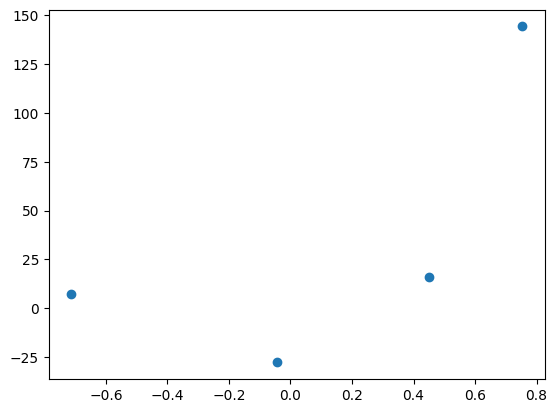

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [ ]:
# firstly, lets apply OLS (ordinary least sqaure)
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [ ]:
print(reg.coef_) # so our slope value is 78.35
print(reg.intercept_) # and our y intercept value is 26.15

[78.35063668]
26.15963284313262


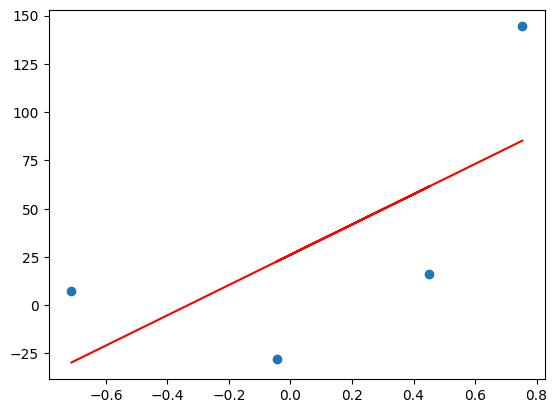

In [ ]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red')
# this is the best fit line

In [ ]:
#  lets consider as m = 78.35 and b = 0 and apply gradient descent
y_pred = ((78.35*x) + 0).reshape(4) # y = mx+c

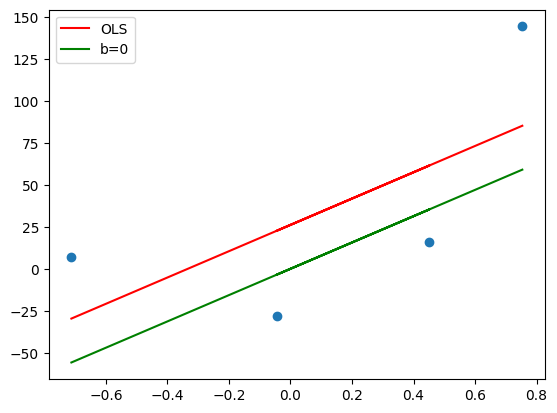

In [ ]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='green',label='b=0')
plt.legend()

Now lets actually apply gradient descent as m = 78.35 and b = 0

In [ ]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope

np.float64(-209.27763408209216)

In [ ]:
# lets take learning rate = 0.1
lr = 0.1
step_size = loss_slope*lr
step_size

np.float64(-20.927763408209216)

In [ ]:
b = b - step_size
b # so we stepped from b = 0 to b = 20.92

np.float64(20.927763408209216)

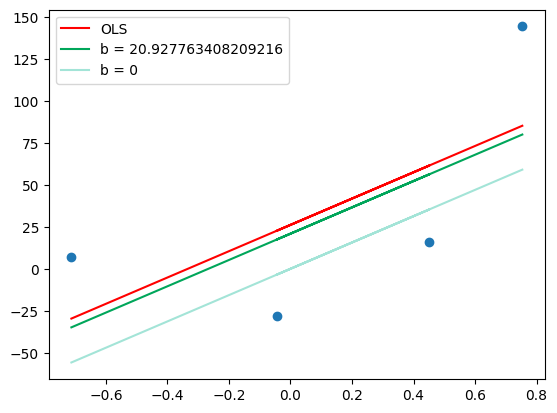

In [ ]:
y_pred1 = ((78.35 * x) + b).reshape(4)
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

So we can see that this is getting closer to the actual b using gradient descent.
lets just put everything in a loop and see the results

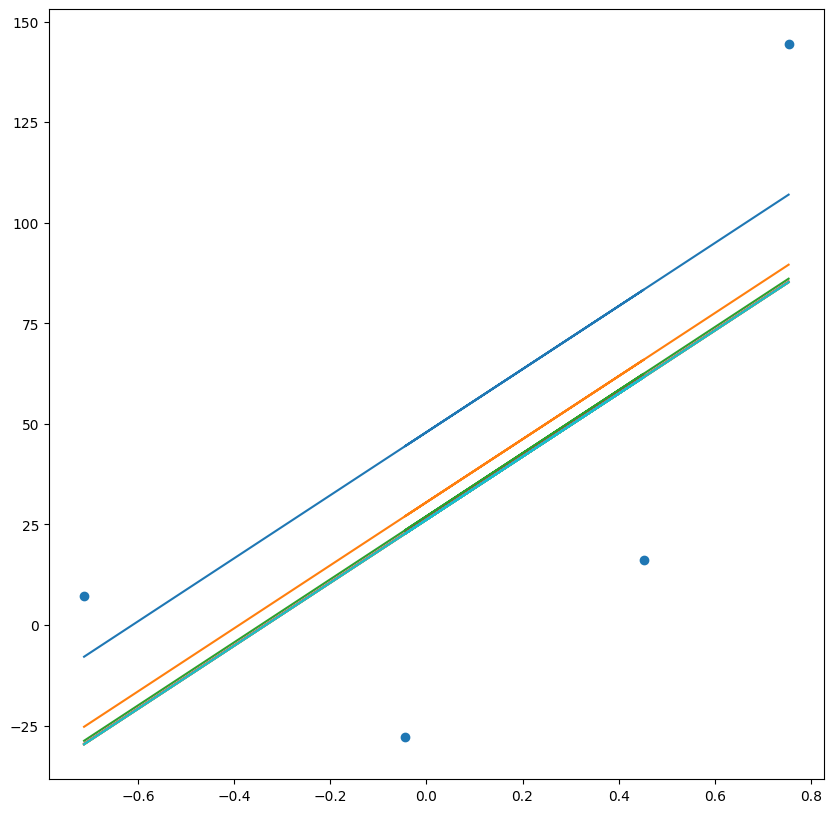

In [ ]:
b = 135
m = 78.35
lr = 0.1
epochs = 10 # number of iterations
plt.figure(figsize=(10,10))
for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*x.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * x + b

  plt.plot(x,y_pred)

plt.scatter(x,y)
# so we can see that using a loop, the value of b=0 approaches the value b=26.1

now i will make a class from scratch which will perform CD

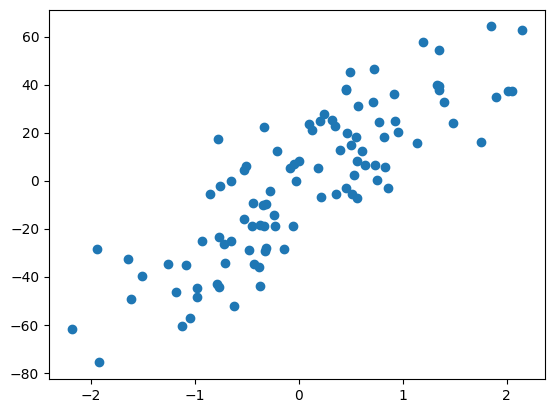

In [ ]:
from sklearn.model_selection import cross_val_score
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [ ]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [ ]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
#  so the r2 score is pretty good at 63%. now lets start the class

0.6345158782661012

In [ ]:
class GD:

    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)

    def predict(self,X):
        return self.m * X + self.b

In [ ]:
gd = GD(0.001,50)
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


so by using the built in function , i got m = [28.12597332] and b = -2.2710144261783825

my model gave m = 28.159367347119066 and b = -2.3004574196824854

its pretty accurate

In [ ]:
r2_score(y_test,gd.predict(X_test))

0.6343842836315579